
# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **TMDB Movie Data Set** contains information about 10,000 movies collected from The Movie Database (TMDb). 
    > The following is the list of all column names, description and their significance for the analysis to answer the questions below.They are marked as S for Significant and NS for not significant based on if it has been used for the analysis.  
    >  **id** (S) : identification number for the rows   
    >  **imdb_id** (NS) : id given by IMDb, not significant, we already have one id column                 
    >  **popularity** (NS) : measure of the poularity based on page views of pages related to the movie.          
    >  **budget** (NS) : the overall cost of the movie, not significant because we will use the adjusted budget column                
    >  **revenue** (NS) : the overall revenue of the movie, not significant because we will use the adjusted revenue column               
    >  **original_title** (NS) : the name of the movie           
    >  **cast** (NS) : the name of the main actors/actreses                 
    >  **homepage** (NS) : the website page for the movie             
    >  **director** (S) : the name of the director of the movie           
    >  **tagline** (NS) :  the tagline of the movie, like the catchphrase or slogan of the movie              
    >  **keywords** (NS)             
    >  **overview** (NS) : short description of the movie           
    >  **runtime** (NS) : length of the movie in minutes                 
    >  **genres**  (S) : the category of the movie based on the setting, characters, plot, mood, tone, and theme. The dataset associated multiple genres for each movie.               
    >  **production_companies**  (NS) :  companies that made the movie  
    >  **release_date** (NS) : the release date including the date,month and year        
    >  **vote_count** (S) : the total number of votes for the movie at IMDb            
    >  **vote_average** (NS) : the average vote the rating out of 10 divided by the number of vote counts         
    >  **release_year** (S) : the year the movie released            
    >  **budget_adj**: Adjusted budget in terms of 2010 dollars, accounting for inflation over time.    
    >  **revenue_adj**: Adjusted revenue in terms of 2010 dollars, accounting for inflation over time.         


### Questions for Analysis
>In this projecct the dataset is investigated to answer the following questions focusing on the properties associated with the highest revenue earner of each release year. 
> 1. Which genre is the most associated with the top movie of the release year by revenue
> 2. Which Director has the most movies which are the top movie of the release year by revenue
> 3. What is the vote average associated with the top movie of the release year by revenue  

In [1]:
# import the packages that are used in this project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report,we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

In [2]:
# Load the data and quick view the top five rows of the data 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>the columns 'cast' , 'genre' and 'production_companies' has mulitiple values Separated by '|' 

In [3]:
#the number of rows and columns 
df.shape

(10866, 21)

>the data has 10866 movies and 21 columns 

In [4]:
#inspect the data types of each column and non null count 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Main take aways 
>1. the imbd_id has 10856 non-null count which means 10 values are NaN, but the id column has 10866 non-null count with no missing value, so it better to use the id column for indexing column 
>2. popularity, budget, revenue, original_title, runtime, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj has 10866 non-null values that means no missing value in these columns 
>3. cast, homepage, director, tagline, keywords, overview, genres, production_companies has missing values
>4. the data types of the columns looks ok. float for values with fractions and int for values whole numbers, object for strings  imbd_id data type is object because it uses letters and numbers to id a movie

In [5]:
#view some basic statistical details
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>from the statistical details we can see that some of the values in budget, revenue, runtime, budget_adj, and revenue_adj has the value of 0. this is something we should look at before the analysis. 

In [6]:
(df[df['revenue_adj']==0]).shape

(6016, 21)

6016 values in revenue_adj are 0 

In [7]:
#number of unique values for each column 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

>Since our question in on genre, director and vote_average impact on revenue of the release_year we should focus on these columns. From the above result we can see that there are 2039 genres (combination of genres), 5067 directors, 72 vote_average unique values, 4840 revenue_adj values, and 56 release years we have to consider. 

In [8]:
#number of duplicated entries 
sum(df.duplicated())

1

>There is only one row which is duplicated, which we need to drop.


### Data Cleaning

 

1. For the analysis we need only need the 'id', 'orginal_title', 'director', 'genres', 'vote_average', 'release_year', and 'revenue_adj' columns. we need to trim the others. the new number of columns should be 7. 
2. remove the duplicated entry
3. remove the 0 values in revenue_adj 
we are going to use revenue_adj column instead of revenue column beacuse it accounts for inflation over time. 

In [9]:
#trim the data by droping the columns that are not significant for the analysis 

ns_columns= ['imdb_id','popularity', 'budget','revenue', 'cast', 'homepage', 'tagline', 'keywords', 
             'overview', 'runtime', 'production_companies', 'release_date','vote_count','budget_adj']
new_df=df.drop(labels=ns_columns,axis=1)

new_df.head()


,id,original_title,director,genres,vote_average,release_year,revenue_adj
0,135397,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.392446e+09
1,76341,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,2015,3.481613e+08
2,262500,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,2015,2.716190e+08
3,140607,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.902723e+09
4,168259,Furious 7,James Wan,Action|Crime|Thriller,7.3,2015,1.385749e+09


In [10]:
new_df.shape

(10866, 7)

In [11]:
#drop duplicated entries
new_df.drop_duplicates(inplace=True)
new_df.shape

(10865, 7)

>we can see the duplicate has been removed by comparing the number of row 

In [12]:
#remove 0 values in revenue_adj
new_df=new_df[new_df['revenue_adj']!=0]

new_df.describe()

,id,vote_average,release_year,revenue_adj
count,4849.000000,4849.000000,4849.000000,4.849000e+03
mean,44575.491648,6.149000,2000.919777,1.151009e+08
std,72368.860461,0.798707,11.569650,1.988557e+08
min,5.000000,2.100000,1960.000000,2.370705e+00
25%,8285.000000,5.600000,1994.000000,1.046585e+07
50%,12154.000000,6.200000,2004.000000,4.395666e+07
75%,43959.000000,6.700000,2010.000000,1.316482e+08
max,417859.000000,8.400000,2015.000000,2.827124e+09


>let's create a data frame which contains the data of the top revenue of the release year 

In [13]:
#extract the release_year and revenue_adj columns 
yearly_revenue=new_df[['release_year','revenue_adj']]

In [14]:
# Group the data by year and compute the index of the row with the maximum revenue for each year using idxmax() function
idx=yearly_revenue.groupby('release_year').idxmax()

In [15]:
# Use the index to select the rows with the maximum revenue for each year from the original DataFrame
top_movies=new_df.loc[idx['revenue_adj']]

In [16]:
top_movies.head()

,id,original_title,director,genres,vote_average,release_year,revenue_adj
10143,967,Spartacus,Stanley Kubrick,Action|Drama|History,6.9,1960,4.423780e+08
10110,12230,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,6.6,1961,1.574815e+09
9850,947,Lawrence of Arabia,David Lean,Adventure|Drama|History|War,7.5,1962,5.045914e+08
10438,657,From Russia With Love,Terence Young,Action|Thriller|Adventure,6.7,1963,5.617734e+08
9881,658,Goldfinger,Guy Hamilton,Adventure|Action|Thriller,7.0,1964,8.780804e+08


In [17]:
top_movies.shape

(56, 7)

one movie for each release_year with the top revenue from 1960-2015 a total of 56 years 

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 Which genre is the most associated with the top movie of the release year by revenue?

Since there are mulitple genres in one movie separated by '|' , we need to split the genres and turn every genre element into a row using explode() function 

In [18]:
#first lets make a copy of the dataframe top_movies
top_movies_genres=top_movies.copy()
top_movies_genres.head()

,id,original_title,director,genres,vote_average,release_year,revenue_adj
10143,967,Spartacus,Stanley Kubrick,Action|Drama|History,6.9,1960,4.423780e+08
10110,12230,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,6.6,1961,1.574815e+09
9850,947,Lawrence of Arabia,David Lean,Adventure|Drama|History|War,7.5,1962,5.045914e+08
10438,657,From Russia With Love,Terence Young,Action|Thriller|Adventure,6.7,1963,5.617734e+08
9881,658,Goldfinger,Guy Hamilton,Adventure|Action|Thriller,7.0,1964,8.780804e+08


In [19]:
# split the 'genres' column on '|' and create a list of strings
top_movies_genres['genres'] =top_movies_genres['genres'].str.split('|')
top_movies_genres.head()

,id,original_title,director,genres,vote_average,release_year,revenue_adj
10143,967,Spartacus,Stanley Kubrick,"[Action, Drama, History]",6.9,1960,4.423780e+08
10110,12230,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,"[Adventure, Animation, Comedy, Family]",6.6,1961,1.574815e+09
9850,947,Lawrence of Arabia,David Lean,"[Adventure, Drama, History, War]",7.5,1962,5.045914e+08
10438,657,From Russia With Love,Terence Young,"[Action, Thriller, Adventure]",6.7,1963,5.617734e+08
9881,658,Goldfinger,Guy Hamilton,"[Adventure, Action, Thriller]",7.0,1964,8.780804e+08


In [20]:
# explode the 'genres' column
new_top_movies_genres = top_movies_genres.explode('genres')
new_top_movies_genres.head()

,id,original_title,director,genres,vote_average,release_year,revenue_adj
10143,967,Spartacus,Stanley Kubrick,Action,6.9,1960,4.423780e+08
10143,967,Spartacus,Stanley Kubrick,Drama,6.9,1960,4.423780e+08
10143,967,Spartacus,Stanley Kubrick,History,6.9,1960,4.423780e+08
10110,12230,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure,6.6,1961,1.574815e+09
10110,12230,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Animation,6.6,1961,1.574815e+09


In [21]:
#lets see how many times a certain genre has been used in top movie of the release year interms of revenue 
new_top_movies_genres.value_counts('genres')

genres
Adventure          37
Action             27
Drama              17
Science Fiction    17
Fantasy            15
Thriller           14
Family             13
Romance             7
Animation           7
Comedy              6
Crime               4
History             3
Mystery             3
Horror              3
Music               2
Western             2
War                 1
dtype: int64

>let's create a visualization for these values using matplotlib bar graph


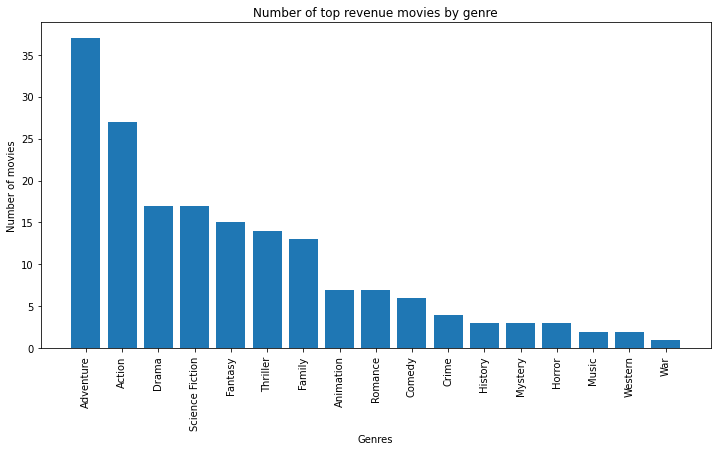

In [22]:

# get the value counts of the 'genres' column
value_counts = new_top_movies_genres['genres'].value_counts()

# get the labels for the x-axis (the unique values in the 'genres' column)
labels = value_counts.index

# get the values for the y-axis (the counts for each unique value)
values = value_counts.values

# Set the figure size
plt.figure(figsize=(12, 6))

# create the bar graph
plt.bar(labels, values)

# Set the x-axis and y-axis labels
plt.xlabel('Genres')
plt.ylabel('Number of movies')

# Set the title
plt.title('Number of top revenue movies by genre')

#rotate the labels 90 degree to make them visible 
plt.xticks(rotation=90)

# show the plot
plt.show()

>Adventure is the most associated genre with movies that are top revenue earner of the release year. Adventure genre is associated with 37 of the movies out of 56 top movies of each year from 1960-2015.  

### Research Question 2  Which Director has the most movies which are the top movie of the release year by revenue?

In [23]:
#similarly first lets make a copy of the dataframe top_movies
top_movies_director=top_movies.copy()
top_movies_director.head()

,id,original_title,director,genres,vote_average,release_year,revenue_adj
10143,967,Spartacus,Stanley Kubrick,Action|Drama|History,6.9,1960,4.423780e+08
10110,12230,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,6.6,1961,1.574815e+09
9850,947,Lawrence of Arabia,David Lean,Adventure|Drama|History|War,7.5,1962,5.045914e+08
10438,657,From Russia With Love,Terence Young,Action|Thriller|Adventure,6.7,1963,5.617734e+08
9881,658,Goldfinger,Guy Hamilton,Adventure|Action|Thriller,7.0,1964,8.780804e+08


In [24]:
top_movies_director.shape

(56, 7)

In [25]:
# split the director column on '|' and create a list of strings
top_movies_director['director'] =top_movies_director['director'].str.split('|')
top_movies_director.head()

,id,original_title,director,genres,vote_average,release_year,revenue_adj
10143,967,Spartacus,[Stanley Kubrick],Action|Drama|History,6.9,1960,4.423780e+08
10110,12230,One Hundred and One Dalmatians,"[Clyde Geronimi, Hamilton Luske, Wolfgang Reit...",Adventure|Animation|Comedy|Family,6.6,1961,1.574815e+09
9850,947,Lawrence of Arabia,[David Lean],Adventure|Drama|History|War,7.5,1962,5.045914e+08
10438,657,From Russia With Love,[Terence Young],Action|Thriller|Adventure,6.7,1963,5.617734e+08
9881,658,Goldfinger,[Guy Hamilton],Adventure|Action|Thriller,7.0,1964,8.780804e+08


In [26]:
# explode the 'director' column
new_top_movies_director = top_movies_director.explode('director')
new_top_movies_director.head()

,id,original_title,director,genres,vote_average,release_year,revenue_adj
10143,967,Spartacus,Stanley Kubrick,Action|Drama|History,6.9,1960,4.423780e+08
10110,12230,One Hundred and One Dalmatians,Clyde Geronimi,Adventure|Animation|Comedy|Family,6.6,1961,1.574815e+09
10110,12230,One Hundred and One Dalmatians,Hamilton Luske,Adventure|Animation|Comedy|Family,6.6,1961,1.574815e+09
10110,12230,One Hundred and One Dalmatians,Wolfgang Reitherman,Adventure|Animation|Comedy|Family,6.6,1961,1.574815e+09
9850,947,Lawrence of Arabia,David Lean,Adventure|Drama|History|War,7.5,1962,5.045914e+08


In [27]:
new_top_movies_director.shape

(63, 7)

>the rows has increased to 63 from 56, which means 7 of the top movies were directed by more than one director 

In [28]:
#lets see which director made how many top movie of the release year 
new_top_movies_director.value_counts('director')

director
Steven Spielberg        6
James Cameron           3
Peter Jackson           3
Wolfgang Reitherman     2
Gore Verbinski          2
Guy Hamilton            2
George Lucas            2
Stanley Kubrick         2
Ron Clements            1
Richard Donner          1
Lewis Gilbert           1
Mel Brooks              1
Michael Bay             1
William Friedkin        1
Mike Newell             1
Mike Nichols            1
Tony Scott              1
Terence Young           1
Roland Emmerich         1
Richard Marquand        1
Kelly Asbury            1
Rob Minkoff             1
Robert Wise             1
Robert Zemeckis         1
Roger Allers            1
Lee Unkrich             1
Adrian Lyne             1
Joss Whedon             1
John Woo                1
Arthur Hiller           1
Barry Levinson          1
Chris Buck              1
Chris Columbus          1
Christopher Nolan       1
Clyde Geronimi          1
Conrad Vernon           1
David Lean              1
David Yates             1
Fra

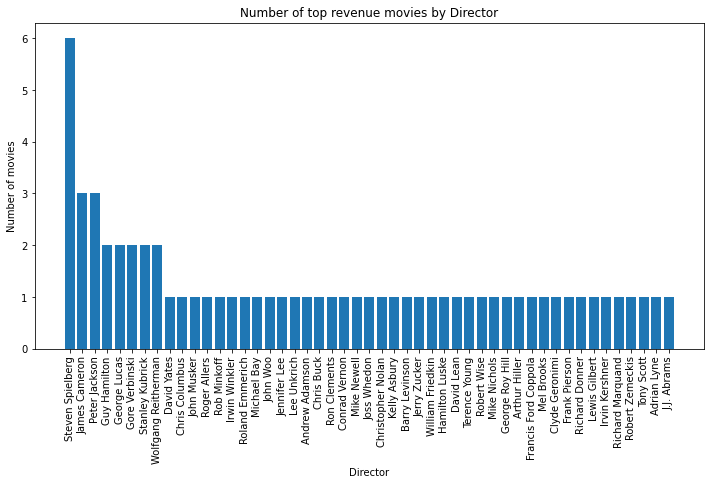

In [29]:
# get the value counts of the 'director' column
value_counts = new_top_movies_director['director'].value_counts()

# get the labels for the x-axis (the unique values in the 'director' column)
labels = value_counts.index

# get the values for the y-axis (the counts for each unique value)
values = value_counts.values

# Set the figure size
plt.figure(figsize=(12, 6))

# create the bar graph
plt.bar(labels, values)

# Set the x-axis and y-axis labels
plt.xlabel('Director')
plt.ylabel('Number of movies')

# Set the title
plt.title('Number of top revenue movies by Director')

#rotate the labels 90 degree to make them visible 
plt.xticks(rotation=90)

# show the plot
plt.show()

>We see that most of the director only made 1 movie that became the top earner of the release year,  
>But some directors has been successful over the years to make top revenue movies. we can filter those to better look at which directors have a repitation of making movies that earns the highest revenue. 
use where() function to filter the value counts 


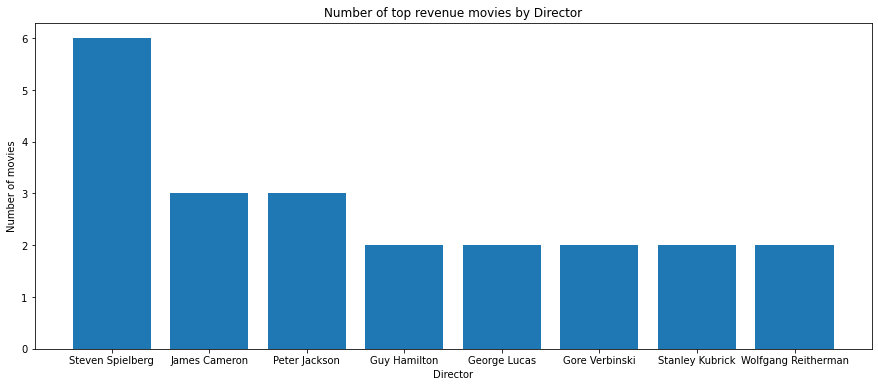

In [30]:
# get the value counts of the 'director' column
value_counts = new_top_movies_director['director'].value_counts()


# filter the value counts to include only those that are greater than 1
filtered_value_counts = value_counts.where(value_counts > 1)

# get the labels for the x-axis (the unique values in the 'director' column)
labels = filtered_value_counts.index

# get the values for the y-axis (the counts for each unique value)
values = filtered_value_counts.values

# Set the figure size
plt.figure(figsize=(15, 6))

# create the bar graph
plt.bar(labels, values)

# Set the x-axis and y-axis labels
plt.xlabel('Director')
plt.ylabel('Number of movies')

# Set the title
plt.title('Number of top revenue movies by Director')

# show the plot
plt.show()

Steven Spielberg by far is the most successful director to make 6 movies which has made the top revenue of their release years.
James Cameron and Peter Jackson has made 3 top movies by revenue of release year each. 
Guy Hamilton, George Lucas, Gore Verbinski, Stanley Kubrick, Wolfgang Reitherman are on 3rd rank with 2 top movies 


### Research Question 3 What is the vote average associated with the top movie of the release year by revenue?

vote_average is a quatitative variable without clear catagories its hard to answer which vote_average is associated with the highest revenue. Therefore we can create a new category 'rating' with pandas cut() function, by using the min,25%, 50%, 75% and max of the vote_average the edges of the cut. 
>Rating:  
>low_rating: Lowest 25% of vote_average values  
>medium_rating: 25% - 50% of vote_average values  
>moderate: 50% - 75% of vote_average values  
>high_rating: 75% - max vote_average value  

In [31]:
#create a copy of top movies and look at the statistics of vote_average 
top_movies_vote=top_movies.copy()
top_movies_vote.describe()['vote_average']

count    56.000000
mean      7.096429
std       0.619960
min       5.600000
25%       6.700000
50%       7.200000
75%       7.500000
max       8.300000
Name: vote_average, dtype: float64

In [32]:
# Bin edges that will be used to "cut" the data into groups
bin_edges=[5.6, 6.7, 7.2, 7.5, 8.3 ]

In [33]:
# Labels for the four rating groups
bin_names= ['low_rating','medium_rating','moderate_rating','high_rating']

In [34]:
#create rating column 
top_movies_vote['rating']=pd.cut(top_movies_vote['vote_average'],bin_edges,labels=bin_names)

In [35]:
# Checks for successful creation of this column
top_movies_vote.head()

,id,original_title,director,genres,vote_average,release_year,revenue_adj,rating
10143,967,Spartacus,Stanley Kubrick,Action|Drama|History,6.9,1960,4.423780e+08,medium_rating
10110,12230,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,6.6,1961,1.574815e+09,low_rating
9850,947,Lawrence of Arabia,David Lean,Adventure|Drama|History|War,7.5,1962,5.045914e+08,moderate_rating
10438,657,From Russia With Love,Terence Young,Action|Thriller|Adventure,6.7,1963,5.617734e+08,low_rating
9881,658,Goldfinger,Guy Hamilton,Adventure|Action|Thriller,7.0,1964,8.780804e+08,medium_rating


In [36]:
top_movies_vote.value_counts('rating')

rating
low_rating         15
moderate_rating    15
medium_rating      14
high_rating        11
dtype: int64

15 of the top movies have a low rating which is less than 6.7 vote_average, 15 are moderate_rating, 14 are medium and only 11 has a high vote_average greater than 7.5

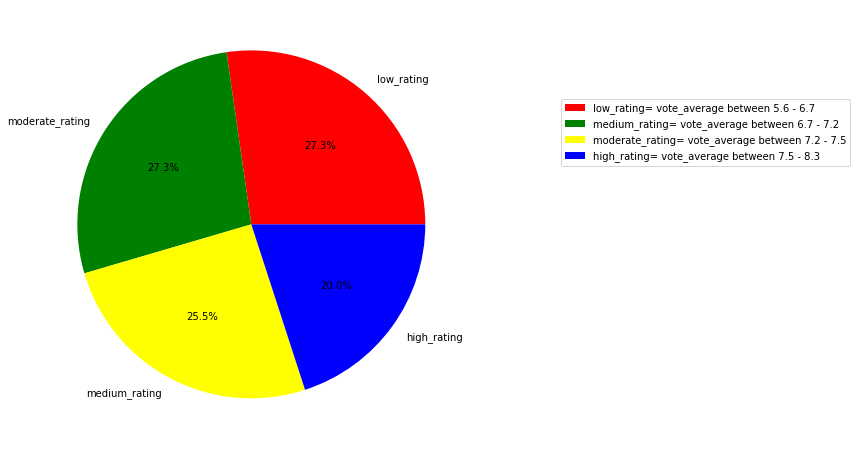

In [37]:
# get the value counts of the 'rating' column
value_counts = top_movies_vote['rating'].value_counts()

# get the values for the slices of the pie chart (the counts for each unique value)
slices = value_counts.values

# get the labels for the slices (the unique values in the 'rating' column)
labels = value_counts.index

# colors for the slices
colors = ['red', 'green', 'yellow', 'blue']

# format for the percentages in the legend
legendformat = '%1.1f%%'

# create a figure and specify the size
fig = plt.figure(figsize=(8, 8))

# draw the pie chart
plt.pie(slices, labels=labels, colors=colors, autopct=legendformat)

# add a description for each rating and specify the location of the legend
plt.legend(['low_rating= vote_average between 5.6 - 6.7', 'medium_rating= vote_average between 6.7 - 7.2',
            'moderate_rating= vote_average between 7.2 - 7.5', 'high_rating= vote_average between 7.5 - 8.3']
           , bbox_to_anchor=(1.2, 0.8))

# show the plot
plt.show()

>From the results we can see that 80% of the top movies has vote_average less than 7.5. And 20% of the top movies has a vote_average greater than 7.5. 

<a id='conclusions'></a>
## Conclusions
> The projects main goal was to see what features are associated with a movie that makes the highest revenue of the release year. The project checked which genre is the most associated with the top movie of the release year by revenue, Which director made most of the top movies over the years, and how the vote_average of the movie affects if it is the top movie of the release year by revenue. 
>The results of the project has shown some insights like 
> 1. Most of the top movies had adventure genre as one of their charcteristics or genre category
> 2. Most of the directors of these top movies directed only one movie that made the highest revenue of the year, with some exceptions like Steven Spilberg who made 6 top movies. 
> 3. Most of the top movies have vote_average less than 7.5  

>From the results we might say that for a movie to be the highest earner of the year it is essential to have adventure genre included in the movies theme, high vote_average does not mean high revenue, and also the movie can be made by any capable director but if it is directed by Steven Spielberg it has a very high chance of being the highest revenue earner of the year. 

>Some of the limitations of the analysis where additional research can be done is the analysis can consider the budget for the movies and see if having high budget relates to getting the highest revenue.  


## References 
>these are the references I used for this project other than the course materials at Udacity  

>https://www.w3schools.com/python/pandas/ref_df_explode.asp#:~:text=Pandas%20DataFrame%20explode%20%28%29%20Method%201%20Definition%20and,not%20change%20the%20original%20DataFrame.%20%E2%9D%AE%20DataFrame%20Reference

>https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/
